Question 1

In [40]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
#import statsmodels.api as sm
from scipy.stats import gaussian_kde
import warnings
warnings.filterwarnings("ignore")
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

<IPython.core.display.Javascript object>


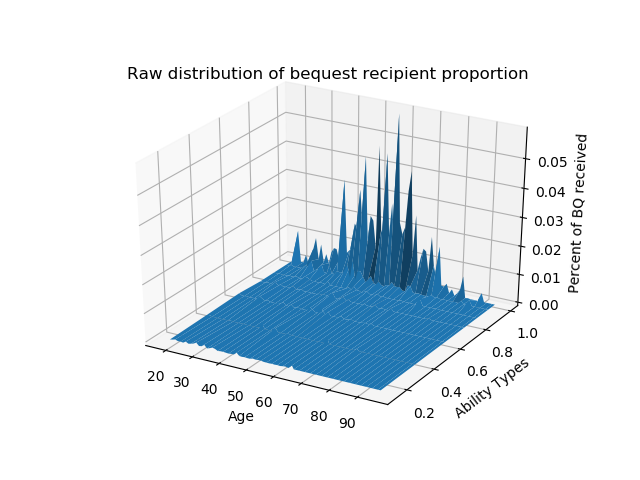

Text(0.5, 0, 'Percent of BQ received')

In [41]:
##PART a:
#I follow the code of the Notebook
bq_data = np.loadtxt('data/BQmat_orig.txt', delimiter=',')
prcntl = np.array([0.25,0.25,0.2,0.1,0.1,0.09,0.01])
prcntl_mdpts = np.array([0.125, 0.375, 0.60, 0.75, 0.85, 0.94, 0.995])
age_vec = np.arange(18,96)
income_mat, age_mat = np.meshgrid(prcntl_mdpts, age_vec)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(age_mat, income_mat, bq_data)
ax.set_title('Raw distribution of bequest recipient proportion')
ax.set_xlabel('Age')
ax.set_ylabel('Ability Types')
ax.set_zlabel('Percent of BQ received')

In [42]:
#PART b:

bq_data = np.loadtxt('data/BQmat_orig.txt', delimiter=',')
ages_vec = np.arange(18, 96)
abils_midpt = np.array([0.125, 0.375, 0.60, 0.75, 0.85, 0.94, 0.995])
prop_mat_inc = np.sum(bq_data, axis=0)
prop_mat_age = np.sum(bq_data, axis=1)
N_samp = 70000
age_prob = np.random.multinomial(N_samp, prop_mat_age)
income_prob = np.random.multinomial(N_samp, prop_mat_inc)
age_freq = np.array([])
inc_freq = np.array([])

for age, num_s in zip(ages_vec, age_prob):
    vec_age_s = np.ones(num_s)
    vec_age_s *= age
    age_freq = np.append(age_freq, vec_age_s)

for abil, num_j in zip(abils_midpt, income_prob):
    vec_abil_j = np.ones(num_j)
    vec_abil_j *= abil
    inc_freq = np.append(inc_freq, vec_abil_j)
    
bandwidth = 0.15
data = np.vstack((age_freq, inc_freq))
density = gaussian_kde(data, bw_method=bandwidth)
data.shape

coords = np.vstack([item.ravel() for item in [age_mat, income_mat]])
kde = density(coords).reshape(age_mat.shape)
kde_scaled = kde / kde.sum()

<IPython.core.display.Javascript object>


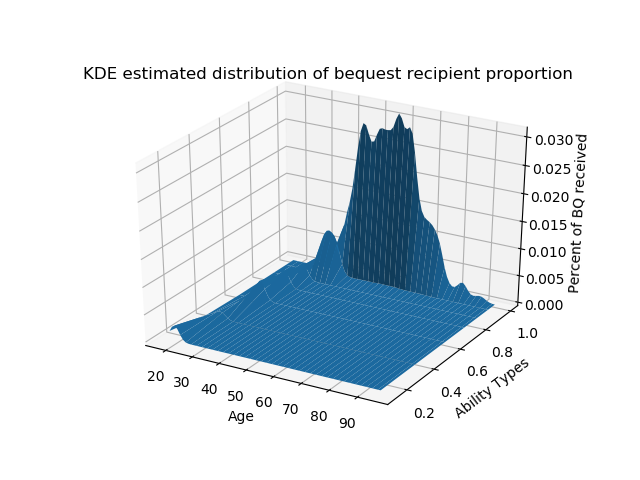

Text(0.5, 0, 'Percent of BQ received')

In [43]:
#The new kernel graph (for a bandwith of 0.15)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(age_mat, income_mat, kde_scaled)
ax.set_title('KDE estimated distribution of bequest recipient proportion')
ax.set_xlabel('Age')
ax.set_ylabel('Ability Types')
ax.set_zlabel('Percent of BQ received')